**Module Title:** Computational Applications OF Artificial Intelligence

**Module Code:** CS4S773

**Module Leader/Tutor:** Dr Mabrouka Abuhmida

**Student Name:** Salma Javid

**Enrollment ID:** 30107961

## **My Journey**

**I. The Beginning:**
I am dealing with two files for this assignment:
1.   The Data Description File
2.   The Trust Bank Database File

**II. Data Analysis — Data Description file**

**My Observation:** Overall we're given a data description file with 160 rows (although the last number on record is 213). Numbers jump from 2 to 5 and then from 124 to 176. Also after #176, the data descriptions refers to some *previous_application.csv* which is NOT shared with us. These are unnecessary descriptions as  the features/columns mentioned after from 176-213 are not available in the trust_bank_data.csv (database) file.

**Operation:**
1.   I ignored the data descriptions from 176 to 213 as they’re out of context.
2.   From the remaining 124 I shortlisted 24 features/columns for my purpose.

**III. Data Analysis — Trust Bank Data file**

**My Observation:** This file contains the data of 590540 bank customers. However, there’s no data available for ALL the main features/columns from row #307513 [TransactionID #3294511]. In total data is missing for 2,83,029 rows/records/clients [Ref: .csv file selection shows it]. Also, the trust_bank_data.csv file already had 14 additional columns/features which are not mentioned in the data_description.csv.

**Operation — Handling Missing Data with Complete case analysis (CCA):**
1.   I removed  all data from row #307513
2.   I shortlisted 08 column/features from the 14 additional features in trust_bank_data.csv file.

**Justification:** If there were some missing values randomly I could have filled them with imputation techniques but filling 283029 values doesn’t seem like a good practice. So I have disregarded all the rows past #307512.

**Conclusion:**  I created a new trust_bank_data.csv file by including only the 24 finalized features/columns from the data description file + 08 from bank data file. My final database file has 32 columns (features) and 307512 rows (including headers) So, I will be analyzing the records of 307511 bank customers where each row represents the bank record of one customer.

**Target feature for this model > "isFraud" feature/column**

In [ ]:
#Script — 1: Importing Libraries
#First, let’s import all the libraries required for our use.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Loading my database file and reading it

trust_bank = pd.read_csv('/content/drive/MyDrive/AI Tasks/trust_bank.csv')

#Script — 2: Using functions/methods to see data as it is.
#the describe () function to see the statistics of each of my shortlisted features.
trust_bank.describe()

#As you can see this code gives out the count, mean, min, max values of my database.

,TransactionID,isFraud,TransactionAmt,addr1,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,FLAG_CONT_MOBILE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
count,3.075110e+05,307511.000000,307511.000000,273176.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000
mean,3.140755e+06,0.033862,132.369913,290.856382,278180.518577,1.687979e+05,5.990260e+05,27108.573909,0.998133,2.052463,2.031521,0.015144,0.078173,5.143927e-01,0.143421,1.405292,0.100049,-962.858788,0.265474
std,8.877092e+04,0.180875,235.613523,102.045933,102790.175348,2.371231e+05,4.024908e+05,14493.737315,0.043164,0.509034,0.502737,0.122126,0.268444,1.910602e-01,0.446698,2.379803,0.362291,826.808487,0.794056
min,2.987000e+06,0.000000,0.292000,100.000000,100002.000000,2.565000e+04,4.500000e+04,1615.500000,0.000000,1.000000,1.000000,0.000000,0.000000,8.170000e-08,0.000000,0.000000,0.000000,-4292.000000,0.000000
25%,3.063878e+06,0.000000,42.559000,204.000000,189145.500000,1.125000e+05,2.700000e+05,16524.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.924574e-01,0.000000,0.000000,0.000000,-1570.000000,0.000000
50%,3.140755e+06,0.000000,68.500000,299.000000,278202.000000,1.471500e+05,5.135310e+05,24903.000000,1.000000,2.000000,2.000000,0.000000,0.000000,5.659614e-01,0.000000,0.000000,0.000000,-757.000000,0.000000
75%,3.217632e+06,0.000000,125.000000,330.000000,367142.500000,2.025000e+05,8.086500e+05,34596.000000,1.000000,2.000000,2.000000,0.000000,0.000000,6.636171e-01,0.000000,2.000000,0.000000,-274.000000,0.000000
max,3.294510e+06,1.000000,31937.391000,540.000000,456255.000000,1.170000e+08,4.050000e+06,258025.500000,1.000000,3.000000,3.000000,1.000000,1.000000,8.549997e-01,34.000000,344.000000,24.000000,0.000000,261.000000


In [ ]:
#the info() function to take a quick overview of the structure and content of the shortlisted columns.

trust_bank.info()
#As you can see it gives out the count of non-null values for all the shortlisted 24 columns (features).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TransactionID                307511 non-null  int64  
 1   isFraud                      307511 non-null  int64  
 2   TransactionAmt               307511 non-null  float64
 3   ProductCD                    307511 non-null  object 
 4   card4                        307499 non-null  object 
 5   card6                        307502 non-null  object 
 6   addr1                        273176 non-null  float64
 7   P_emaildomain                259002 non-null  object 
 8   SK_ID_CURR                   307511 non-null  int64  
 9   NAME_CONTRACT_TYPE           307511 non-null  object 
 10  CODE_GENDER                  307511 non-null  object 
 11  FLAG_OWN_CAR                 307511 non-null  object 
 12  FLAG_OWN_REALTY              307511 non-null  object 
 13 

In [ ]:
#The head() method:
#Now, let's try listing the first few records of the database in an 8x6 inch darkgrid plot using the head() function.
plt.rcParams["figure.figsize"]=[8,6]
sns.set_style("darkgrid")
trust_bank.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card4,card6,addr1,P_emaildomain,SK_ID_CURR,NAME_CONTRACT_TYPE,...,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
0,2987000,0,68.5,W,discover,credit,315.0,NaN,100002,Cash loans,...,2,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,-1134.0,0.0
1,2987001,0,29.0,W,mastercard,credit,325.0,gmail.com,100003,Cash loans,...,1,0,0,School,0.622246,0.0,1.0,0.0,-828.0,0.0
2,2987002,0,59.0,W,visa,debit,330.0,outlook.com,100004,Revolving loans,...,2,0,0,Government,0.555912,0.0,0.0,0.0,-815.0,0.0
3,2987003,0,50.0,W,mastercard,debit,476.0,yahoo.com,100006,Cash loans,...,2,0,0,Business Entity Type 3,0.650442,0.0,2.0,0.0,-617.0,NaN
4,2987004,0,50.0,H,mastercard,credit,420.0,gmail.com,100007,Cash loans,...,2,0,0,Religion,0.322738,0.0,0.0,0.0,-1106.0,0.0


In [ ]:
#Script — 3: Handling missing data
#categorical data - Frequent Category Imputation  - Missing category imputation
#Let's now replace all the empty (blank) values in the categorical data columns (features) of the trust_bank DataFrame with NaN (Not a Number) using the Pandas library
trust_bank.replace('', np.nan, inplace=True)
trust_bank = trust_bank.replace(r'^\s*$', np.nan, regex=True)



In [ ]:
#Numerical Data - Mean or Median Imputation
#Let's now replace all the null values in the numerical columns (features) of the trust_bank DataFrame with the mean using the Pandas library
trust_bank.isnull().mean()

TransactionID                  0.000000
isFraud                        0.000000
TransactionAmt                 0.000000
ProductCD                      0.000000
card4                          0.000039
card6                          0.000029
addr1                          0.111655
P_emaildomain                  0.157747
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000039
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
FLAG_CONT_MOBILE               0.000000
OCCUPATION_TYPE                0.313455
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_CITY_NOT_LIVE_CITY         0.000000


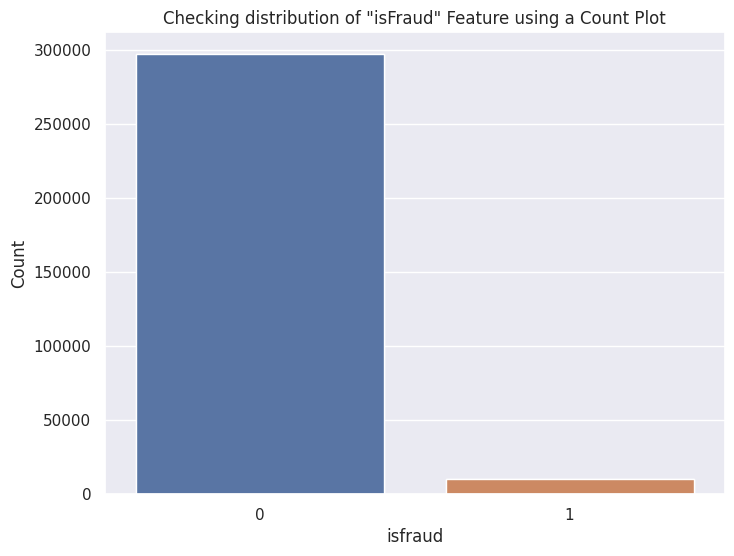

In [ ]:
#Script — 4: Data Visualization
#Checking distribution of isFraud Feature with a Count Plot to compare the number of fraud transactions VS (no fraud) honest transactions. It is Binary data where 1 refers to yes, and Y refers to no.
sns.countplot(x='isFraud', data=trust_bank)

#Result: 0 represents non-fraud transactions and 1 presents fraud transactions.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=trust_bank)
plt.xlabel('isfraud')
plt.ylabel('Count')
plt.title('Checking distribution of "isFraud" Feature using a Count Plot')
plt.show()


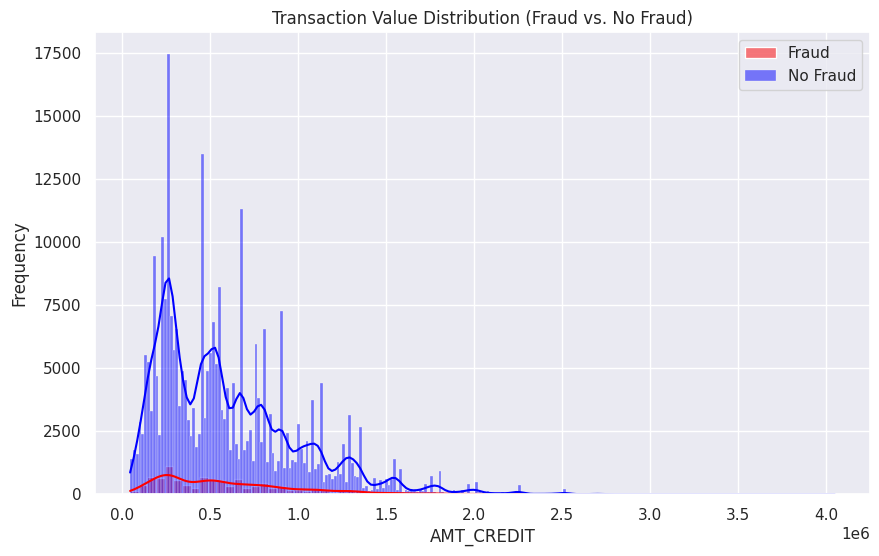

In [ ]:
#Script — 5: Transaction value distribution of fraud and no fraud transactions.
#Now let’s check AMT_CREDIT feature and find out the count of fraud vs. (no fraud) honest clients.
trust_bank = pd.read_csv('/content/drive/MyDrive/AI Tasks/trust_bank.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=trust_bank[trust_bank['isFraud'] == 1], x='AMT_CREDIT', kde=True, label='Fraud', color='red')

sns.histplot(data=trust_bank[trust_bank['isFraud'] == 0], x='AMT_CREDIT', kde=True, label='No Fraud', color='blue')

plt.title('Transaction Value Distribution (Fraud vs. No Fraud)')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<ipython-input-60-08f596840abf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trust_bank['AMT_CREDIT'], kde=True, bins=30)


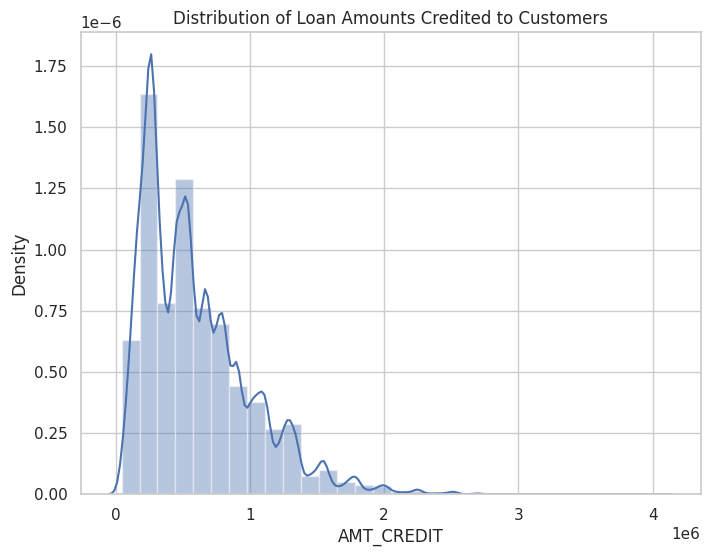

In [ ]:
#Script — 6: DistPlot: To find out the distribution density of the AMT_CREDIT column/feature.
#It contains continuous numerical data (amount is in fractions for certain client records)

sns.set(style="whitegrid")
sns.distplot(trust_bank['AMT_CREDIT'], kde=True, bins=30)
plt.xlabel('AMT_CREDIT')
plt.ylabel('Density')
plt.title('Distribution of Loan Amounts Credited to Customers')
plt.show()

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

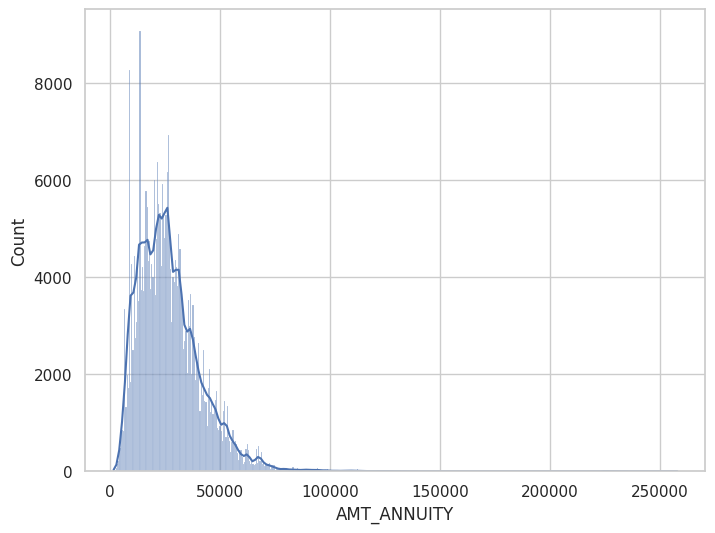

In [ ]:
#Script — 6: Creating a HISTOGRAM for the 'AMT_ANNUITY' column in the trust_bank database
sns.histplot(trust_bank['AMT_ANNUITY'], kde = True)

Text(0.5, 1.0, 'Determining the male & female loan-taker-ratio')

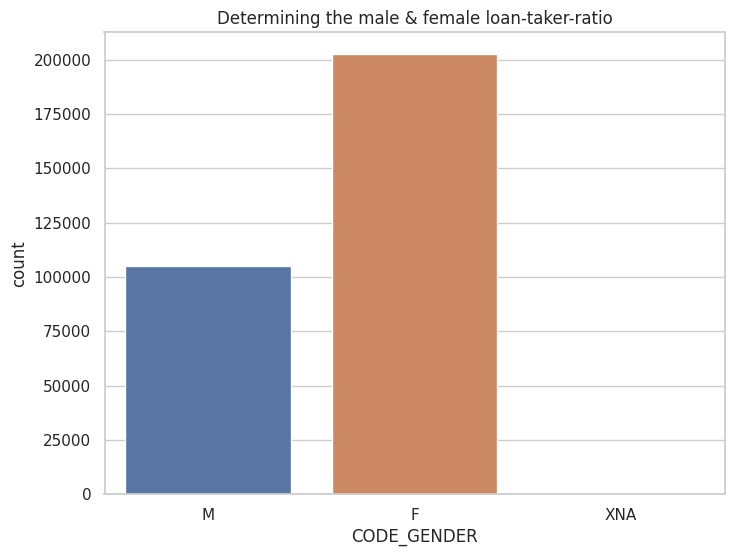

In [ ]:
#Script — 7: Count Plot
#Let's create a count plot to know the number of males and females (Categorical data with cardinality 2) in the 'CODE_GENDER' column of the trust_bank database. It also helps us determine the male & female loan-taker-ratio.
sns.countplot(x='CODE_GENDER', data=trust_bank)
plt.title('Determining the male & female loan-taker-ratio')
#Result: Wowie!! Females 💃 are leading (actually double) in the number of loan takers when compared to males.

In [ ]:
#Script — 8: Using Pandas now let’s find the predominant fraudulent gender.

import pandas as pd
fraudsters = trust_bank[trust_bank['isFraud'] == 1]
fraud_gender = fraudsters['CODE_GENDER'].value_counts()
predominant_fraudulent_gender = fraud_gender.sort_values(ascending=False)
print(predominant_fraudulent_gender)

#Result: Oh dear! Females appear to be the most predominant fraudelent gender.

F    6747
M    3666
Name: CODE_GENDER, dtype: int64


In [ ]:
#Script — 14: Missing Categorical Data
#Let's find the number of missing client email IDs
nan_count = trust_bank['P_emaildomain'].isna().sum()
print("Number of NaN values in 'P_emaildomain':", nan_count)

Number of NaN values in 'P_emaildomain': 48509


In [ ]:
#Script — 15: Predominant Fraudulent Email Domains
#Let's write a code that identifies the most predominant fraudulent email domains among the transactions marked as fraudulent ('isFraud' equals 1).
fraud = trust_bank[trust_bank['isFraud'] == 1]
fraud_client_emails = fraud['P_emaildomain'].value_counts()
predominant_fraudulent_emails = fraud_client_emails.sort_values(ascending=False)
print(predominant_fraudulent_emails)

#Result: As you can see the GMAIL domain tops the list of email domains used for fraudulent transactions

gmail.com          5056
hotmail.com        1312
yahoo.com          1163
anonymous.com       492
aol.com             334
outlook.com         238
icloud.com           95
live.com             59
comcast.net          57
mail.com             48
msn.com              38
outlook.es           26
aim.com              25
bellsouth.net        24
ymail.com            23
protonmail.com       18
hotmail.es           16
cox.net              12
verizon.net          11
att.net              11
me.com               10
yahoo.com.mx          9
charter.net           8
gmail                 8
live.com.mx           7
optonline.net         7
earthlink.net         6
yahoo.fr              5
frontiernet.net       5
suddenlink.net        4
sbcglobal.net         4
rocketmail.com        1
cableone.net          1
prodigy.net.mx        1
roadrunner.com        1
Name: P_emaildomain, dtype: int64


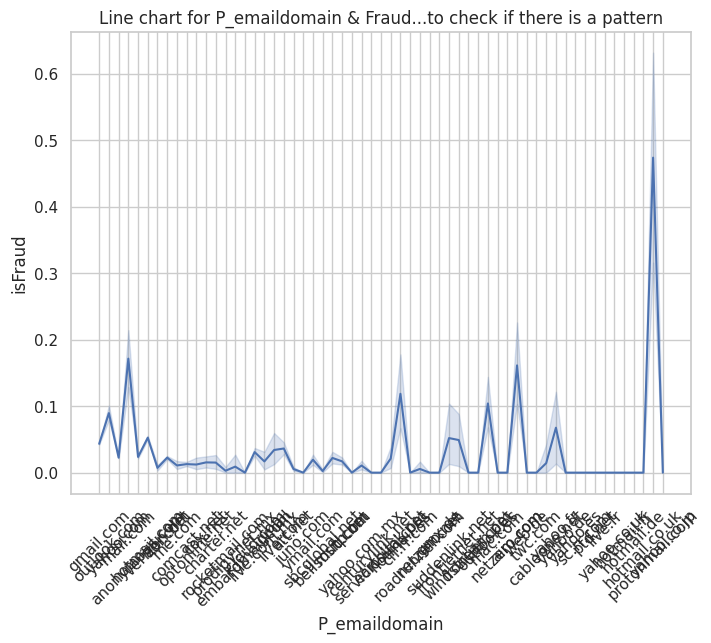

In [ ]:
#Script — 16: Line plot for Email Domain feature to check if there's a pattern.
x = trust_bank["P_emaildomain"]
y = trust_bank["isFraud"]

sns.lineplot(x=x, y=y)
plt.rcParams["figure.figsize"]=[8,6]
sns.set_style("darkgrid")

plt.ylabel('isFraud')
plt.xlabel('P_emaildomain')
plt.title('Line chart for P_emaildomain & Fraud...to check if there is a pattern')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Script — 17: Predominant Fraudulent Client Type
# Let’s find the predominant fraudulent client type by using pandas on the ‘NAME_INCOME_TYPE’ feature (correlation to the ‘isFraud’ feature).
import pandas as pd
fraudsters = trust_bank[trust_bank['isFraud'] == 1]
client_status = fraudsters['NAME_INCOME_TYPE'].value_counts()
predominant_fraudulent_clients = client_status.sort_values(ascending=False)
print(predominant_fraudulent_clients)

#Result: Damn! A student involved in Fraud too! Working class clients lead the league of fraudsters followed by commercial associates, pensioners, state servants and a student, in that order.

Working                 5407
Commercial associate    2461
Pensioner               1827
State servant            717
Student                    1
Name: NAME_INCOME_TYPE, dtype: int64


In [ ]:
#Script — 18: Predominant Card Type
#Let’s figure out which card (credit or debit) was used the most for fraudulent transactions.
import pandas as pd
fraud = trust_bank[trust_bank['isFraud'] == 1]
card = fraud ['card6'].value_counts()
card_for_fraud = card.sort_values(ascending=False)
print(card_for_fraud)

#Result: Both cards appear to have been used euqally!

credit    5362
debit     5049
Name: card6, dtype: int64


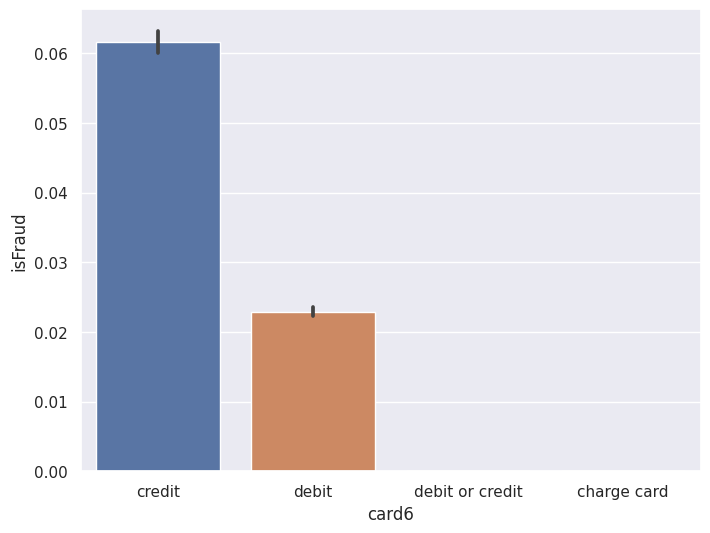

In [ ]:
#Script — 19: Now let's check the same using a barplot
sns.barplot(x='card6', y='isFraud', data=trust_bank)
plt.rcParams["figure.figsize"]=[8,6]
#Result: Credit Card seems to be used more for Frauds, when compared to Debit.
#This contradicts the panda code result above!

In [ ]:
#Script — 20: Finding Predominant Fraudulent Products
import pandas as pd
fraud_products = trust_bank[trust_bank['isFraud'] == 1]
fraud_prod_count = fraud_products['ProductCD'].value_counts()
predominant_fraudulent_products = fraud_prod_count.sort_values(ascending=False)
print(predominant_fraudulent_products)

#Result: Prodcut "W" leads the way in terms of products bought from fraudulent transactions, followed by the product ‘C’, and then H, R, and S in that order.

W    4311
C    3899
H    1032
R     847
S     324
Name: ProductCD, dtype: int64


<Axes: xlabel='ProductCD', ylabel='isFraud'>

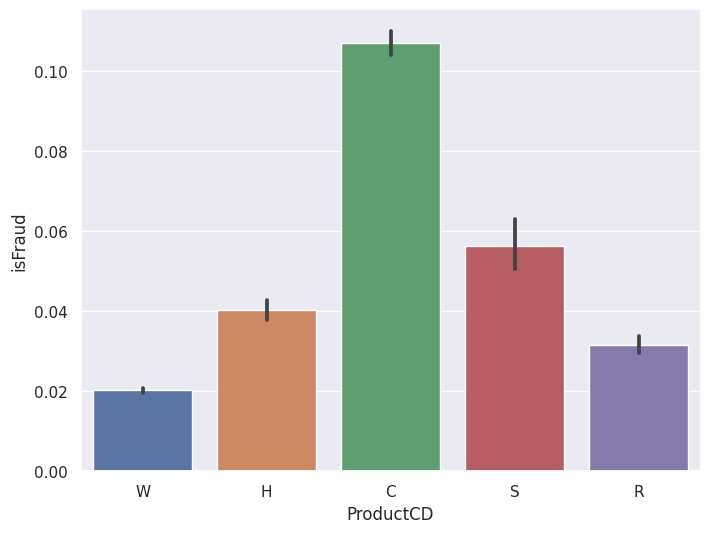

In [ ]:
#Script — 21: Bar plot for products and isFraud feature... to see if there's a pattern
sns.barplot(x='ProductCD', y='isFraud', data=trust_bank)

#ClosedThread — Fraud is happening with all products though C is leading.

In [ ]:
#Script — 22: Predominant Fraudulent Loan Type
#Let’s figure out which type of loans encounter the most fraudulent transactions: ‘Cash Loans’ or ‘Revolving Loans’
import pandas as pd
fraud = trust_bank[trust_bank['isFraud'] == 1]
fraud_type_count = fraud_products['NAME_CONTRACT_TYPE'].value_counts()
predominant_fraud_type = fraud_type_count.sort_values(ascending=False)
print(predominant_fraud_type)

#Result: Cash loans seem to be the most fraudulent.

Cash loans         9327
Revolving loans    1086
Name: NAME_CONTRACT_TYPE, dtype: int64


<Axes: xlabel='isFraud', ylabel='NAME_CONTRACT_TYPE'>

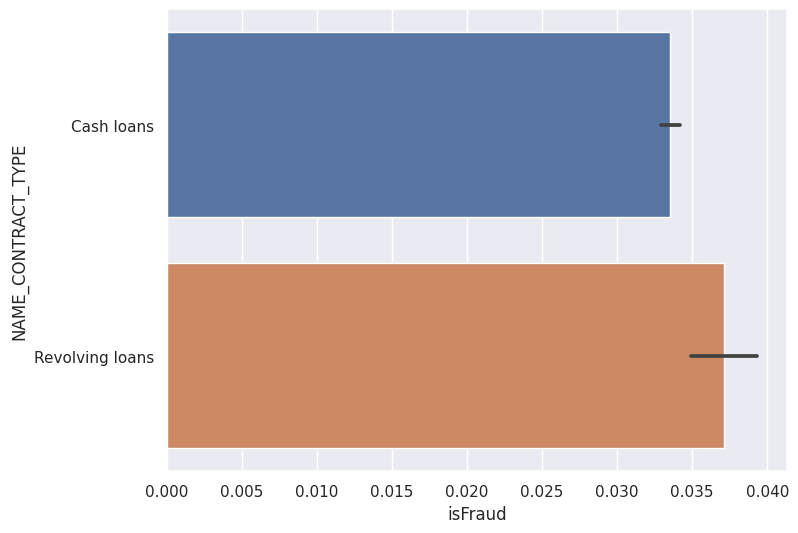

In [ ]:
#Script — 23: Let's map a barplot for loan type
sns.barplot(y='NAME_CONTRACT_TYPE', x='isFraud', data=trust_bank)

#Result: This contradicts the Panda code result.

<Axes: ylabel='AMT_INCOME_TOTAL'>

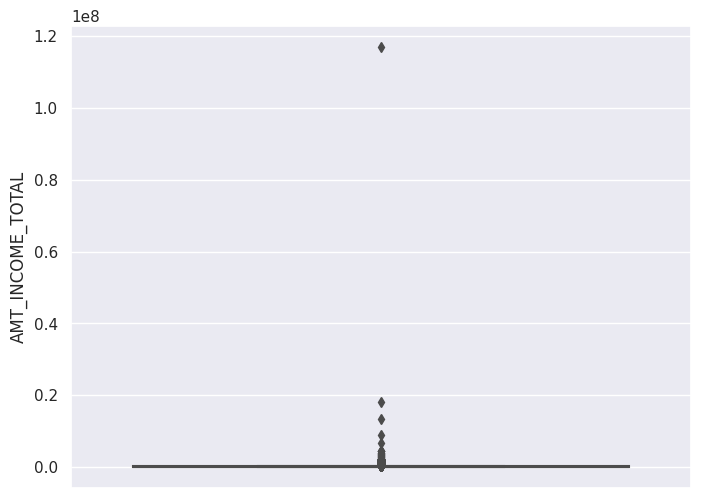

In [ ]:
#Script — 24: Time to find the Outliers
#A box plot to identify the outliers in client's income column (Continuous data) - You can see outliers in the form of isolated black dots.
sns.boxplot(y='AMT_INCOME_TOTAL', data=trust_bank)

<Axes: ylabel='DAYS_LAST_PHONE_CHANGE'>

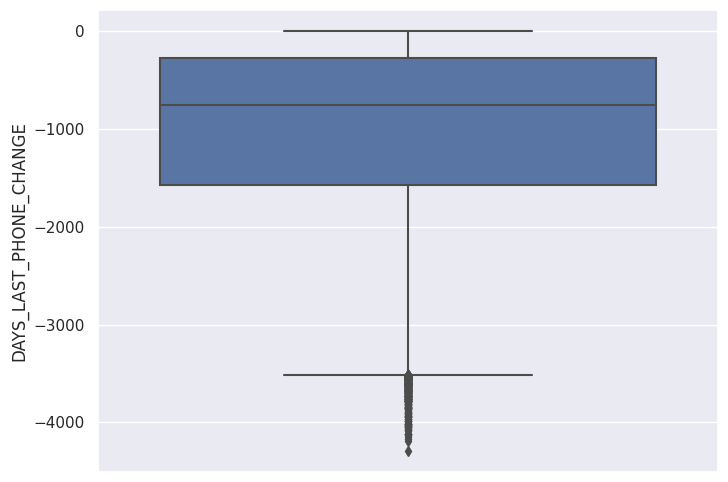

In [ ]:
#Script — 25: Box plot to know how many days before application did client change phone

sns.boxplot(y='DAYS_LAST_PHONE_CHANGE', data=trust_bank)

<Axes: ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

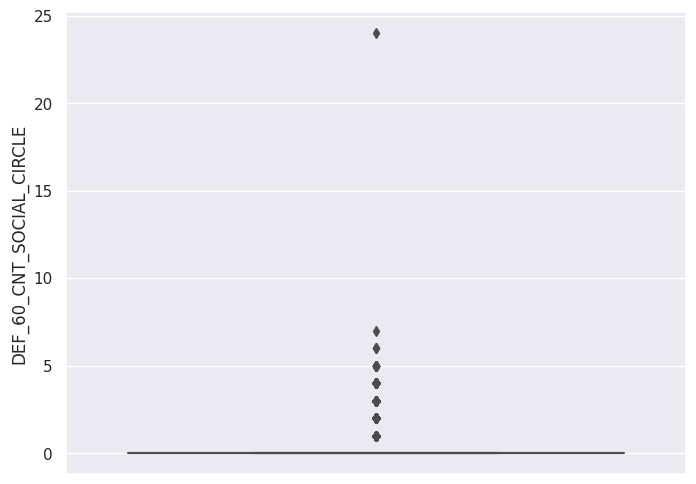

In [ ]:
#Script — 26: How many observation of client's social surroundings defaulted on 60 (days past due) DPD

sns.boxplot(y='DEF_60_CNT_SOCIAL_CIRCLE', data=trust_bank)

<Axes: xlabel='isFraud', ylabel='OCCUPATION_TYPE'>

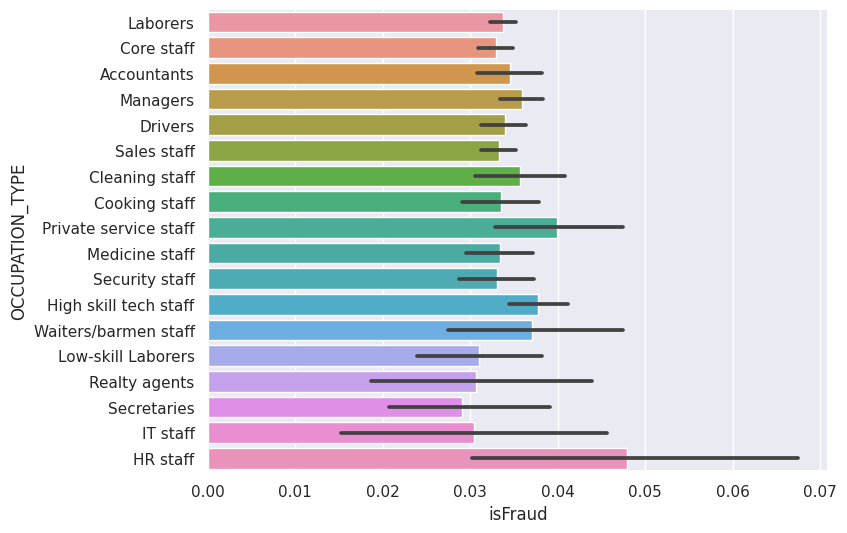

In [ ]:
#Script — 27: Barplot to find a pattern in occupation (Nominal data) of the client and fraud
sns.barplot(y='OCCUPATION_TYPE', x='isFraud', data=trust_bank)

#Result: The HR Staff does the most frauds.

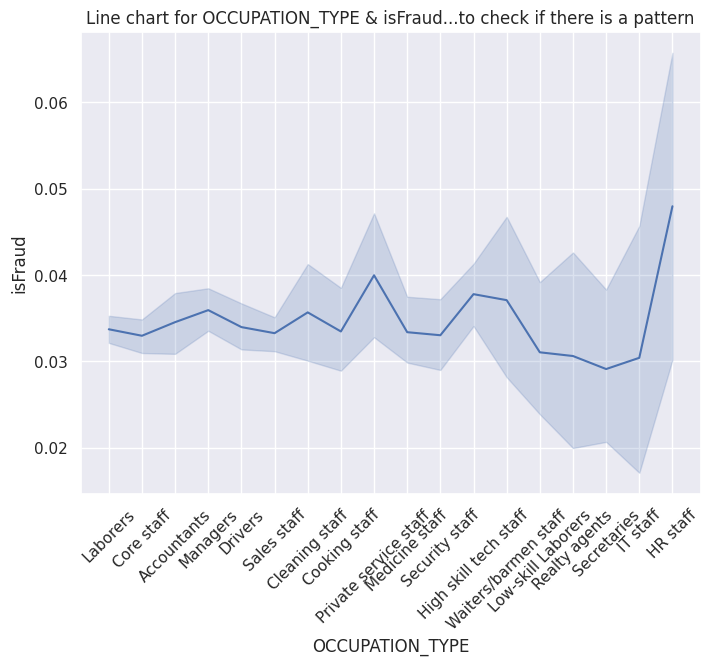

In [ ]:
#Script — 28: Line plot for OCCUPATION_TYPE & Fraud...to check if there is a pattern
x = trust_bank["OCCUPATION_TYPE"]
y = trust_bank["isFraud"]

sns.lineplot(x=x, y=y)

plt.ylabel('isFraud')
plt.xlabel('OCCUPATION_TYPE')
plt.title('Line chart for OCCUPATION_TYPE & isFraud...to check if there is a pattern')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='card4', ylabel='isFraud'>

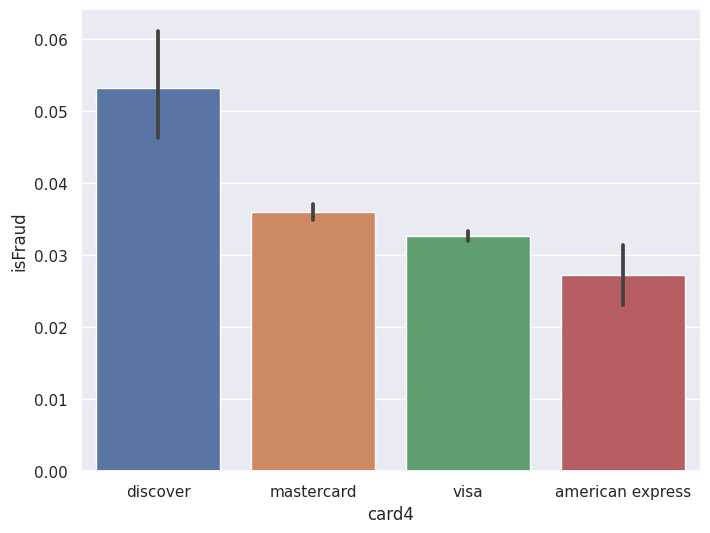

In [ ]:
#Script — 29: Barplot to find a pattern in card kind (discover, Master Card, VISA, etc.) of the client and fraud
sns.barplot(x='card4', y='isFraud', data=trust_bank)

#Result: ClosedThread — All cards are used in fraud!

<Axes: xlabel='isFraud', ylabel='NAME_EDUCATION_TYPE'>

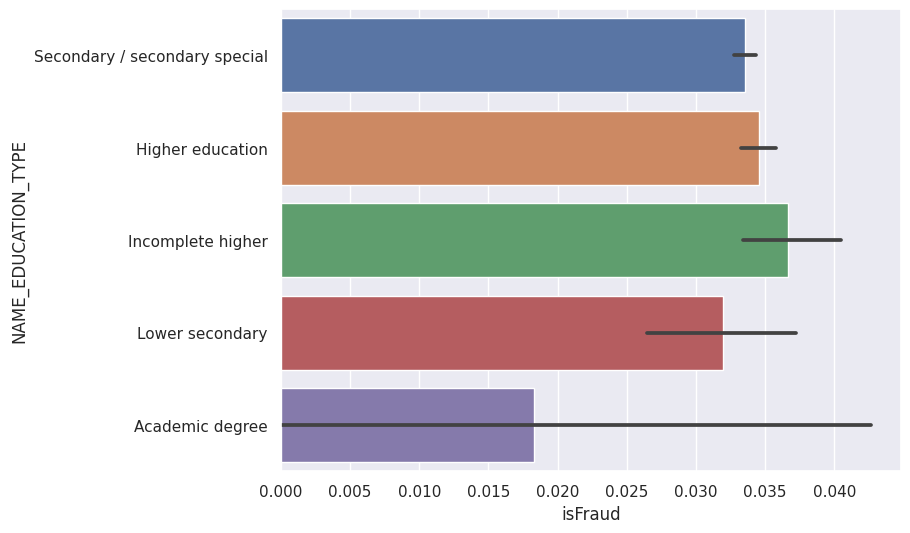

In [ ]:
#Script — 30: Bar chart for education type (Ordinal data) and isFraud feature… to find a pattern
sns.barplot(y='NAME_EDUCATION_TYPE', x='isFraud', data=trust_bank)
#Result: Almost everyone commits frauds... None in particular!

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='isFraud'>

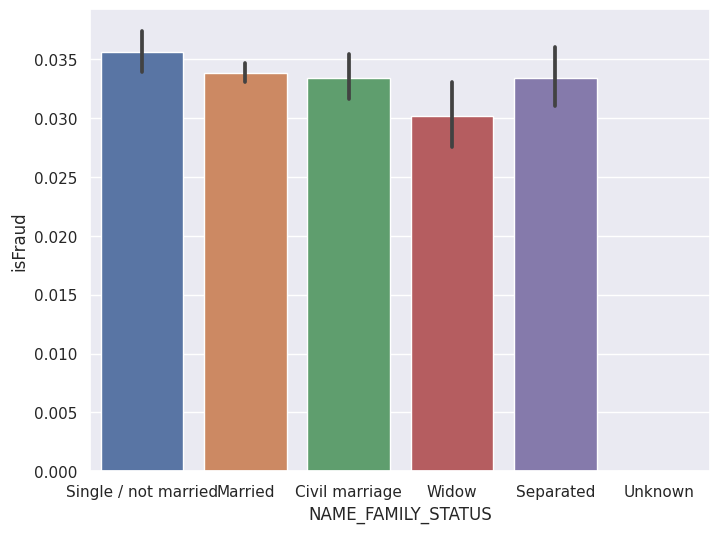

In [ ]:
#Script — 31: Bar chart for family status (Mixed Variable) and isFraud feature… to find a pattern
sns.barplot(x='NAME_FAMILY_STATUS', y='isFraud', data=trust_bank)

<Axes: xlabel='FLAG_CONT_MOBILE', ylabel='count'>

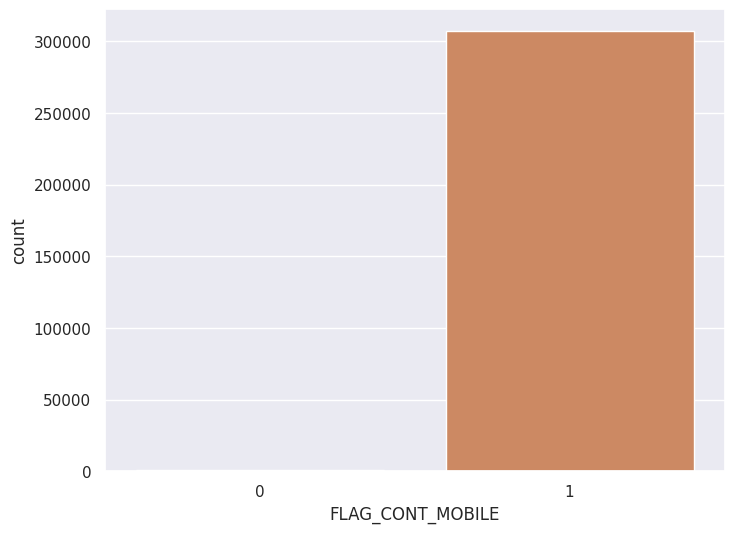

In [ ]:
#Script — 32: A count plot to know if client's mobile phone reachable (1=YES, 0=NO)

sns.countplot(x='FLAG_CONT_MOBILE', data=trust_bank)

<Axes: xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='count'>

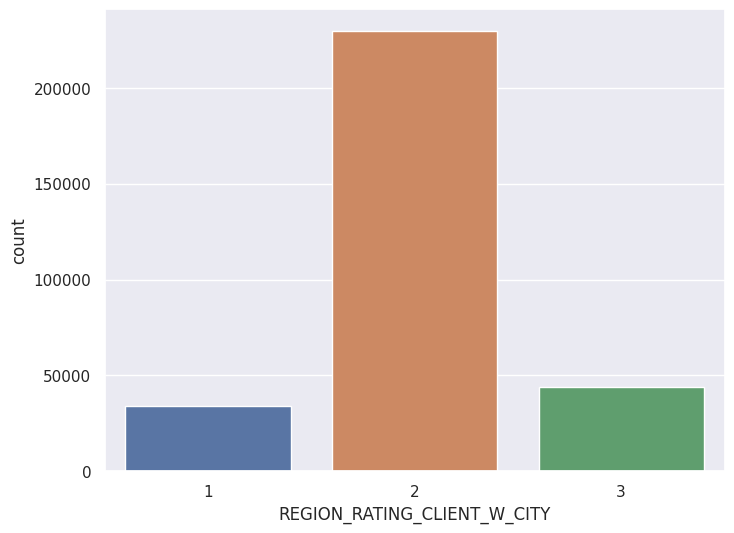

In [ ]:
#Script — 33: Program to analyze and print the counts of different rating levels in two columns, 'REGION_RATING_CLIENT_W_CITY (Discrete Data), within the dataset for fraudulent transactions.
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data=trust_bank)

<Axes: xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='isFraud'>

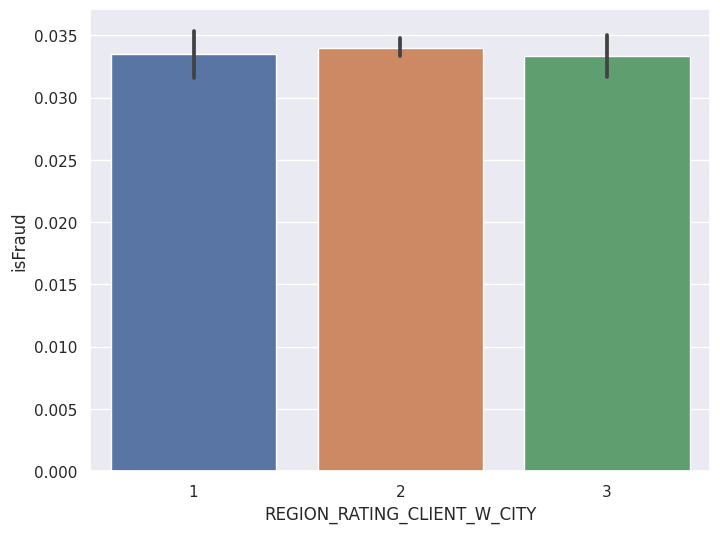

In [ ]:
import pandas as pd
import seaborn as sns
trust_bank = pd.read_csv('/content/drive/MyDrive/AI Tasks/trust_bank.csv')
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y='isFraud', data=trust_bank)

In [ ]:
#Script — 34: Encoding Categorical Data — The techniques used to convert numeric data into categorical data are called categorical data encoding
#CODE_GENDER column can be converted to numeric data

import pandas as pd
temp = pd.get_dummies(trust_bank['CODE_GENDER'])
temp.head()

,F,M,XNA
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
#Script — 35: Now let’s display the actual gender and the one hot encoded version for the gender column in the same dataframe.

pd.concat([trust_bank['CODE_GENDER'],
           pd.get_dummies(trust_bank['CODE_GENDER'])], axis=1).head()

,CODE_GENDER,F,M,XNA
0,M,0,1,0
1,F,1,0,0
2,M,0,1,0
3,F,1,0,0
4,M,0,1,0


<ipython-input-87-15b7f8d246cf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trust_bank.corr(method='pearson')


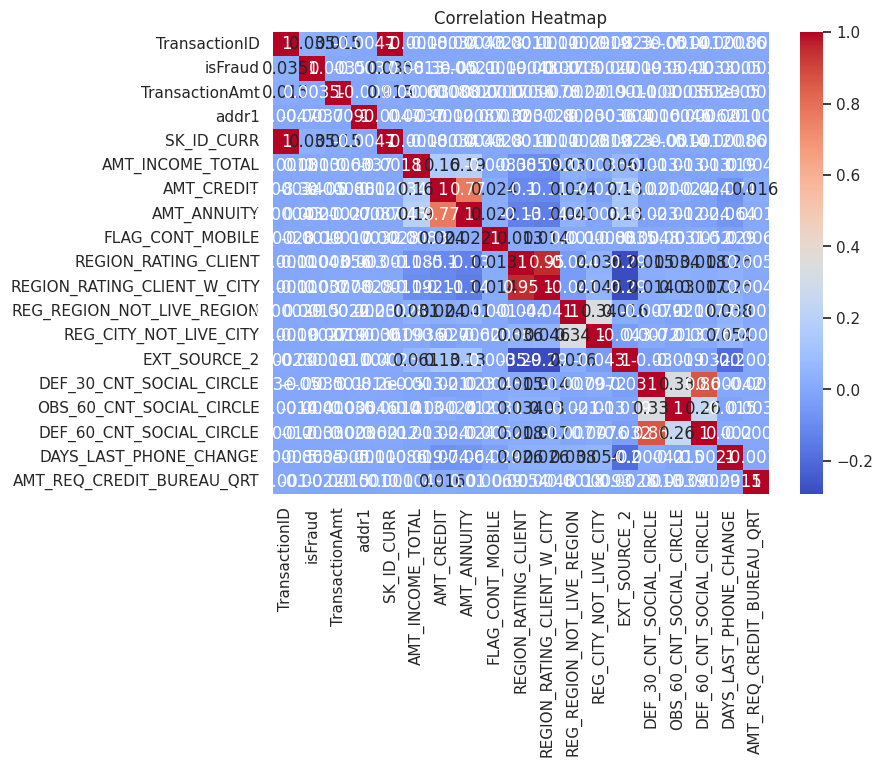

In [ ]:
#Script — 36: Compute Pearson correlation as taught in class

import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = trust_bank.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Script — 37: Finding a correlation between different features of trust bank database
correlation_matrix = trust_bank.corr()
print(correlation_matrix)



<ipython-input-88-160d627466f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trust_bank.corr()


                             TransactionID   isFraud  TransactionAmt  \
TransactionID                     1.000000  0.035364        0.015171   
isFraud                           0.035364  1.000000        0.003509   
TransactionAmt                    0.015171  0.003509        1.000000   
addr1                            -0.004714 -0.003725       -0.009015   
SK_ID_CURR                        0.999999  0.035359        0.015173   
AMT_INCOME_TOTAL                 -0.001819  0.001316        0.000633   
AMT_CREDIT                       -0.000343 -0.000083       -0.000876   
AMT_ANNUITY                      -0.000435  0.002061        0.000270   
FLAG_CONT_MOBILE                  0.002818 -0.001901        0.000174   
REGION_RATING_CLIENT             -0.001073 -0.000434        0.000561   
REGION_RATING_CLIENT_W_CITY      -0.001136 -0.000366        0.000777   
REG_REGION_NOT_LIVE_REGION       -0.000287  0.001517       -0.002164   
REG_CITY_NOT_LIVE_CITY           -0.001885 -0.000269        0.00

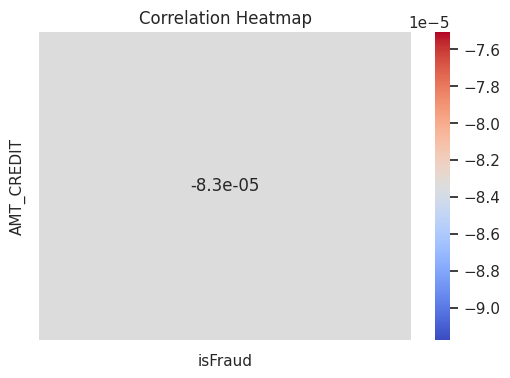

In [ ]:
#Script — 38: Trying Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation_coefficient = trust_bank['AMT_CREDIT'].corr(trust_bank['isFraud'])
correlation_df = pd.DataFrame(data=correlation_coefficient, index=['AMT_CREDIT'], columns=['isFraud'])

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

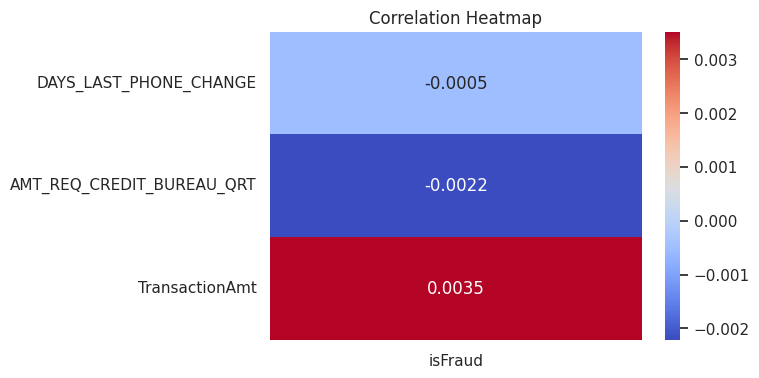

In [ ]:
#Script — 39: Correlation Heatmap for 3x1 variables/features
import seaborn as sns
import matplotlib.pyplot as plt

features_to_compare = ['DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'TransactionAmt']
correlation_df = trust_bank[features_to_compare].corrwith(trust_bank['isFraud']).to_frame(name='isFraud')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

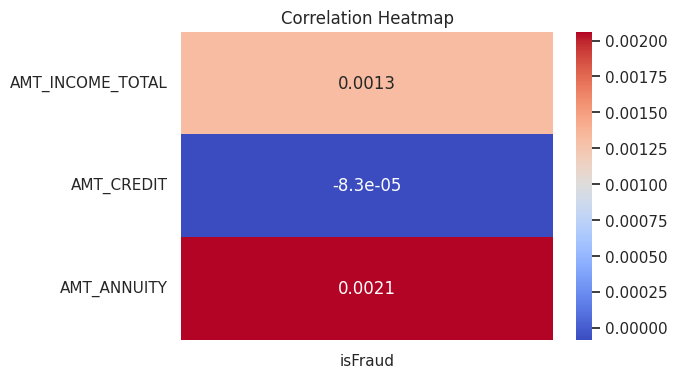

In [ ]:
#Script — 40: Comparing the different features of database to find correlation between income of the client, total credit, amount annuity and isFraud
import seaborn as sns
import matplotlib.pyplot as plt

features_to_compare = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
correlation_df = trust_bank[features_to_compare].corrwith(trust_bank['isFraud']).to_frame(name='isFraud')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

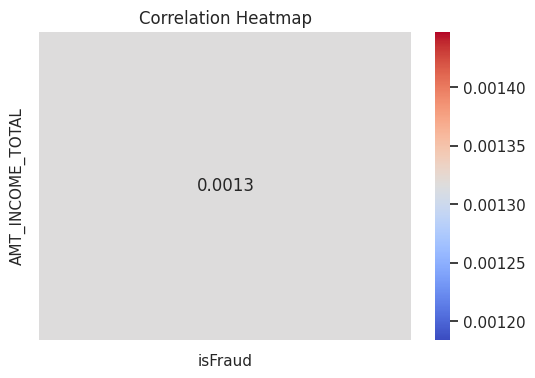

In [ ]:
#Script — 41: Correlation Heatmap for clien'ts income and fraud feature.
import seaborn as sns
import matplotlib.pyplot as plt

features_to_compare = ['AMT_INCOME_TOTAL']
correlation_df = trust_bank[features_to_compare].corrwith(trust_bank['isFraud']).to_frame(name='isFraud')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Script — 42: Program to analyze and print the counts of different rating levels in two columns, 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY', within the dataset for fraudulent transactions.
# insights into the distribution of ratings for fraudulent cases.
import pandas as pd
fraud = trust_bank[trust_bank['isFraud'] == 1]
customer_region_rating = fraud ['REGION_RATING_CLIENT'].value_counts()
city_region_rating = fraud ['REGION_RATING_CLIENT_W_CITY'].value_counts()
rr = customer_region_rating.sort_values(ascending=False)
crr = city_region_rating.sort_values(ascending=False)
print(rr)
print(crr)

2    7725
3    1611
1    1077
Name: REGION_RATING_CLIENT, dtype: int64
2    7807
3    1462
1    1144
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


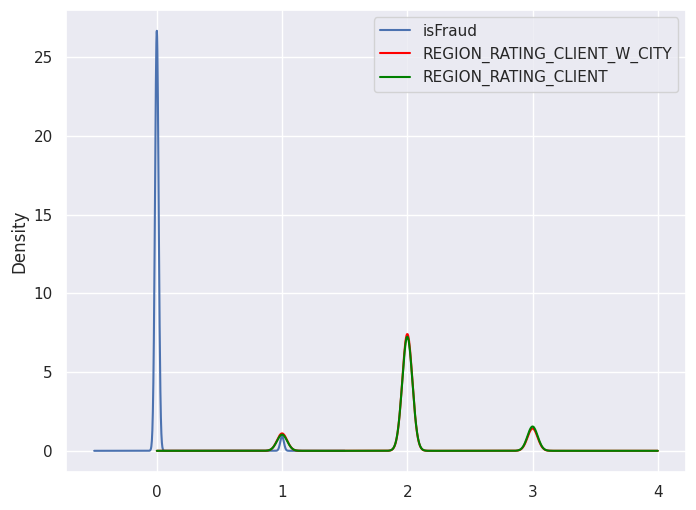

In [ ]:
#Script — 43: (KDE - Kernel Density Estimation) plot to visualize the distribution of three columns ('isFraud', 'REGION_RATING_CLIENT_W_CITY', and 'REGION_RATING_CLIENT')
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

trust_bank['isFraud'] .plot(kind='kde', ax=ax)
trust_bank['REGION_RATING_CLIENT_W_CITY'] .plot(kind='kde', ax=ax, color='red')
trust_bank['REGION_RATING_CLIENT'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
#Script — 44: Data Discretization — The process of converting continuous numeric values into discrete intervals is called discretization or binning.
#I opt for Equal Frequency Discretization as taught in class

discretised_income, bins = pd.qcut(trust_bank['AMT_INCOME_TOTAL'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_income, trust_bank['AMT_INCOME_TOTAL']], axis=1). head(10)

print(bins)
print(type(bins))

discretised_income.value_counts()
#This should disply a the binned income of clients

[2.5650e+04 8.1000e+04 9.9000e+04 1.1250e+05 1.3500e+05 1.4715e+05
 1.6200e+05 1.8000e+05 2.2500e+05 2.7000e+05 1.1700e+08]
<class 'numpy.ndarray'>


(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL, dtype: int64

In [ ]:
#Success above...
#Script — 45: Now let's create bin labels

bin_labels = ['Bin_no_' +str(i) for i in range(1,11)]
print (bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [ ]:
#Success above again!
#Script — 46: Now let's see the bins in head() function

trust_bank['income_bins'] = pd.cut(x=trust_bank['AMT_INCOME_TOTAL'], bins=bins, labels=bin_labels, include_lowest=True)
trust_bank.head(7)

,TransactionID,isFraud,TransactionAmt,ProductCD,card4,card6,addr1,P_emaildomain,SK_ID_CURR,NAME_CONTRACT_TYPE,...,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,income_bins
0,2987000,0,68.5,W,discover,credit,315.0,NaN,100002,Cash loans,...,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,-1134.0,0.0,Bin_no_8
1,2987001,0,29.0,W,mastercard,credit,325.0,gmail.com,100003,Cash loans,...,0,0,School,0.622246,0.0,1.0,0.0,-828.0,0.0,Bin_no_9
2,2987002,0,59.0,W,visa,debit,330.0,outlook.com,100004,Revolving loans,...,0,0,Government,0.555912,0.0,0.0,0.0,-815.0,0.0,Bin_no_1
3,2987003,0,50.0,W,mastercard,debit,476.0,yahoo.com,100006,Cash loans,...,0,0,Business Entity Type 3,0.650442,0.0,2.0,0.0,-617.0,NaN,Bin_no_4
4,2987004,0,50.0,H,mastercard,credit,420.0,gmail.com,100007,Cash loans,...,0,0,Religion,0.322738,0.0,0.0,0.0,-1106.0,0.0,Bin_no_4
5,2987005,0,49.0,W,visa,debit,272.0,gmail.com,100008,Cash loans,...,0,0,Other,0.354225,0.0,0.0,0.0,-2536.0,1.0,Bin_no_2
6,2987006,0,159.0,W,visa,debit,126.0,yahoo.com,100009,Cash loans,...,0,0,Business Entity Type 3,0.724000,0.0,1.0,0.0,-1562.0,1.0,Bin_no_7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

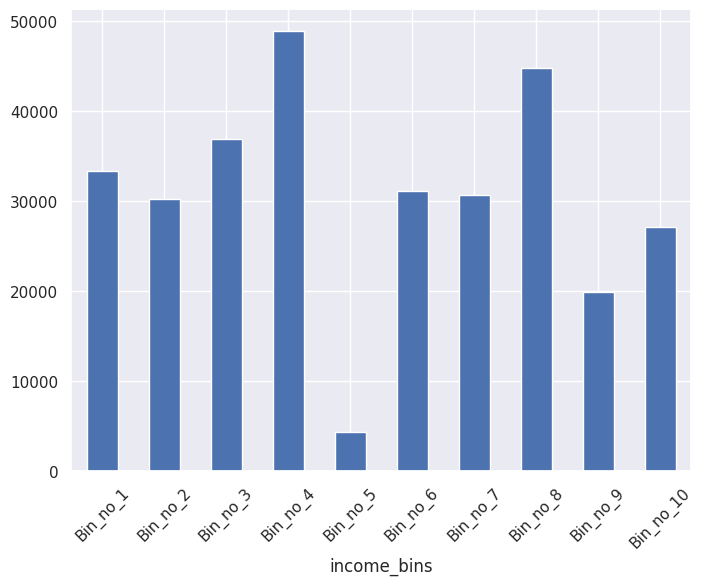

In [ ]:
#Script — 47: To see plotbar for bins created
trust_bank.groupby('income_bins')['AMT_INCOME_TOTAL'].count().plot.bar()
plt.xticks(rotation=45)


In [ ]:
#Replacing all missing numeric values in the DataFrame with 0
trust_bank.fillna(0, inplace=True)

In [ ]:
#Replacing all categorical values in the DataFrame at once
categorical_replacements = {
    'card4': np.NAN,
    'addr1': np.NAN,
    'P_emaildomain': np.NAN,
'OCCUPATION_TYPE': np.NAN,
'DEF_30_CNT_SOCIAL_CIRCLE': np.NAN,
'EXT_SOURCE_2': np.NAN,
'OBS_60_CNT_SOCIAL_CIRCLE': np.NAN,
'DEF_60_CNT_SOCIAL_CIRCLE': np.NAN,
'DAYS_LAST_PHONE_CHANGE': np.NAN,
'AMT_REQ_CREDIT_BUREAU_QRT': np.NAN }
trust_bank.replace(categorical_replacements, inplace=True)
trust_bank = trust_bank.replace(to_replace=r'/', value=' ', regex=True)
trust_bank = trust_bank.replace(to_replace=r':', value=' ', regex=True)
trust_bank = trust_bank.replace(to_replace=r'-', value=' ', regex=True)

In [ ]:
trust_bank = trust_bank.drop(columns=['ORGANIZATION_TYPE'])


In [ ]:
trust_bank_data = pd.read_csv('/content/drive/MyDrive/Assignment/Old/trust_bank_data.csv')
trust_bank_data.isnull().mean()
myString = "#".strip("#")

**BLACK BOX**

The following function serves as your "black box" RandomForest classifier. Use it exactly as provided. The only modifications required on your part are to adjust the dataframe name in the usage section and specify the appropriate target column name to match your dataset's structure.

In [ ]:
#Script — 48: BlackBox

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_classification_model(trust_bank_data, isFraud):
"""
    # Splitting the data
    X = trust_bank_data.drop(isFraud, axis=1)
    y = trust_bank_data[isFraud]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Getting accuracy and report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

    return model, report

# Usage
# instead of df pass on your dataframe name

train_classification_model(trust_bank_data, 'isFraud')


SyntaxError: ignored